In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Generating a synthetic dataset for simulation
np.random.seed(42)

# Simulate 1000 transactions
n = 1000
data = {
    'amount': np.random.lognormal(mean=2, sigma=1, size=n),  # Log-normal distribution for transaction amount
    'time': np.random.normal(12, 2, n),                      # Random times of day
    'location': np.random.choice(['Location_1', 'Location_2', 'Location_3'], size=n),  # Random location
    'is_fraud': np.random.choice([0, 1], size=n, p=[0.95, 0.05])  # 5% fraudulent transactions
}

df = pd.DataFrame(data)

# Add some noise to simulate anomaly detection
df['amount'] = df['amount'] + np.random.normal(0, 0.1, n)

# Display the first few rows
df.head()

,amount,time,location,is_fraud
0,12.067460,14.798711,Location_2,0
1,6.430420,13.849267,Location_3,0
2,14.113935,12.119261,Location_2,0
3,33.870525,10.706126,Location_3,0
4,5.850580,13.396447,Location_3,0


In [ ]:
# Encoding categorical 'location' as numerical data
df['location'] = df['location'].map({'Location_1': 0, 'Location_2': 1, 'Location_3': 2})

# Normalize the 'amount' and 'time' features
scaler = StandardScaler()
df[['amount', 'time']] = scaler.fit_transform(df[['amount', 'time']])

# Check the data
df.head()

,amount,time,location,is_fraud
0,-0.020207,1.332576,1,0
1,-0.332194,0.856405,2,0
2,0.093057,-0.011240,1,0
3,1.186505,-0.719965,2,0
4,-0.364286,0.629303,2,0


Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       768
           1       0.04      0.09      0.05        32

    accuracy                           0.87       800
   macro avg       0.50      0.50      0.49       800
weighted avg       0.92      0.87      0.89       800

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       196
           1       0.06      0.25      0.10         4

    accuracy                           0.91       200
   macro avg       0.52      0.58      0.52       200
weighted avg       0.97      0.91      0.93       200

Accuracy: 0.91
Precision: 0.06
Recall: 0.25
F1 Score: 0.10


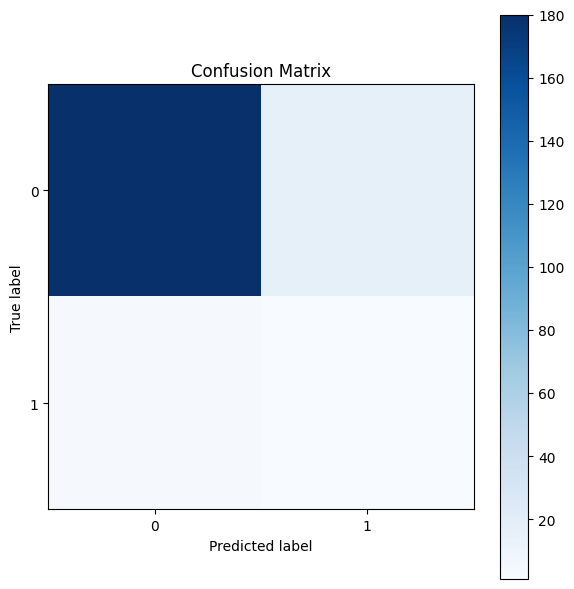

In [ ]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming df is already defined in the environment and contains the 'is_fraud' column
# Split the DataFrame into features and labels
X = df.drop('is_fraud', axis=1)  # Features
y = df['is_fraud']               # Labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model for anomaly detection
svm_model = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')

# Train the One-Class SVM model
svm_model.fit(X_train)

# Predict anomalies (frauds)
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Convert predictions to binary (1 for fraud, 0 for not fraud)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = [0, 1]
plt.xticks(np.arange(2), classes)
plt.yticks(np.arange(2), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

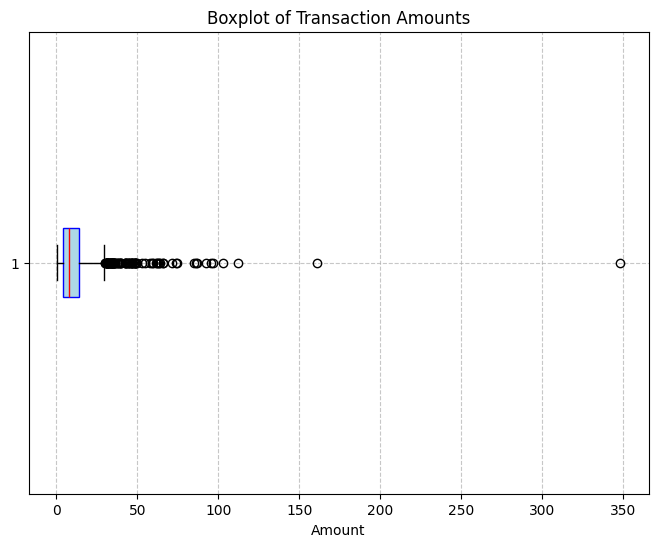

In [ ]:
# ipython-input-1-109b9cb25577
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt to make it available in this file
import pandas as pd
import numpy as np

# Generating a synthetic dataset for simulation
np.random.seed(42)

# Simulate 1000 transactions
n = 1000
data = {
    'amount': np.random.lognormal(mean=2, sigma=1, size=n),  # Log-normal distribution for transaction amount
    'time': np.random.normal(12, 2, n),                      # Random times of day
    'location': np.random.choice(['Location_1', 'Location_2', 'Location_3'], size=n),  # Random location
    'is_fraud': np.random.choice([0, 1], size=n, p=[0.95, 0.05])  # 5% fraudulent transactions
}

df = pd.DataFrame(data)

# Add some noise to simulate anomaly detection
df['amount'] = df['amount'] + np.random.normal(0, 0.1, n)



# Boxplot to visualize the distribution of transaction amounts
plt.figure(figsize=(8, 6))
plt.boxplot(df['amount'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Amount")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()